In [2]:
import pandas as pd
import numpy as np

from collections import defaultdict

from sklearn.preprocessing import LabelEncoder

# EDA

In [3]:
train_df = pd.read_csv('movies_train.csv')
test_df = pd.read_csv('movies_test.csv')
submit = pd.read_csv('submission.csv')

In [416]:
len(train_df), len(test_df)

(600, 243)

In [417]:
train_df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [418]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [419]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           243 non-null    object 
 1   distributor     243 non-null    object 
 2   genre           243 non-null    object 
 3   release_time    243 non-null    object 
 4   time            243 non-null    int64  
 5   screening_rat   243 non-null    object 
 6   director        243 non-null    object 
 7   dir_prev_bfnum  107 non-null    float64
 8   dir_prev_num    243 non-null    int64  
 9   num_staff       243 non-null    int64  
 10  num_actor       243 non-null    int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 21.0+ KB


In [420]:
for col in train_df.columns:
    print(col, len(train_df[col].unique()))

title 600
distributor 169
genre 12
release_time 330
time 86
screening_rat 4
director 472
dir_prev_bfnum 246
dir_prev_num 6
num_staff 296
num_actor 17
box_off_num 586


```
title : 영화의 제목
distributor : 배급사
genre : 장르
release_time : 개봉일
time : 상영시간(분)
screening_rat : 상영등급
director : 감독이름
dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)
num_staff : 스텝수
num_actor : 주연배우수
box_off_num : 관객수
```

```
title 600 제외
distributor 169 이산화
genre 12 이산화
release_time 330 이산화
time 86 그대로
screening_rat 4 이산화
director 472 제거
dir_prev_bfnum 246 제외 또는 예측 또는 2way 학습 또는 T or F
dir_prev_num 6 그대로
num_staff 296 그대로
num_actor 17 그대로
box_off_num 586 예측 컬럼
```

In [421]:
train_df.corr()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
time,1.000000,0.264675,0.306727,0.623205,0.114153,0.441452
dir_prev_bfnum,0.264675,1.000000,0.131822,0.323521,0.083818,0.283184
dir_prev_num,0.306727,0.131822,1.000000,0.450706,0.014006,0.259674
num_staff,0.623205,0.323521,0.450706,1.000000,0.077871,0.544265
num_actor,0.114153,0.083818,0.014006,0.077871,1.000000,0.111179
box_off_num,0.441452,0.283184,0.259674,0.544265,0.111179,1.000000


## title

In [422]:
train_df.drop(columns=['title'], inplace=True)
test_df.drop(columns=['title'], inplace=True)

## distributor

In [423]:
train_df.distributor.unique()

array(['롯데엔터테인먼트', '(주)쇼박스', '(주)NEW', '쇼박스(주)미디어플렉스', '백두대간',
       '유니버설픽쳐스인터내셔널코리아', '(주)두타연', '(주) 케이알씨지', '(주)콘텐츠 윙', '(주)키노아이',
       '(주)팝 파트너스', 'CJ E&M 영화부문', '(주) 영화제작전원사', 'CJ E&M Pictures',
       'CGV 무비꼴라쥬', '리틀빅픽처스', '스폰지', 'CJ 엔터테인먼트', 'CGV아트하우스', '조이앤시네마',
       '인디플러그', '콘텐츠판다', '인디스토리', '(주)팝엔터테인먼트', '시네마서비스', '웃기씨네',
       '영화사 진진', '(주)레인보우 팩토리', '김기덕 필름', 'NEW', 'CJ CGV',
       '동국대학교 충무로영상제작센터', 'BoXoo 엔터테인먼트', '(주)마운틴픽쳐스', 'CGV 아트하우스',
       '메가박스(주)플러스엠', '골든타이드픽처스', '파이오니아21', '디 씨드', '드림팩트 엔터테인먼트', '시너지',
       '디마엔터테인먼트', '판다미디어', '(주)스톰픽쳐스코리아', '(주)예지림 엔터테인먼트', '(주) 영화사조제',
       '보람엔터테인먼트', '(주)시네마달', '노바엔터테인먼트', '(주)패스파인더씨앤씨', '(주)대명문화공장',
       '(주)온비즈넷', 'KT&G 상상마당', '무비꼴라쥬', '인벤트 디', '씨네그루(주)키다리이엔티',
       '스튜디오후크', '시네마 달', '나이너스엔터테인먼트(주)', 'THE 픽쳐스', '영구아트무비', '리틀빅픽쳐스',
       '어뮤즈', '이모션 픽처스', '(주)이스트스카이필름', '필라멘트 픽쳐스', '조이앤컨텐츠그룹', '타임스토리그룹',
       '마운틴 픽처스', '(주)휘엔터테인먼트', '이십세기폭스코리아(주)', '(주)피터팬픽쳐스', '에스와이코마드',
       '(주)더픽쳐스', '오퍼스픽쳐스'

In [424]:
train_df.groupby('distributor').box_off_num.count().sort_values(ascending=False)[:50]

distributor
CJ 엔터테인먼트        54
롯데엔터테인먼트         52
(주)NEW           30
(주)마운틴픽쳐스        29
(주)쇼박스           26
인디스토리            26
골든타이드픽처스         15
(주) 케이알씨지        14
(주)키노아이          10
(주) 영화사조제        10
어뮤즈              10
시네마달             10
영화사 진진           10
시너지              10
인디플러그             9
인벤트 디             8
KT&G 상상마당         8
NEW               8
스폰지               7
시네마 달             6
시네마서비스            6
무비꼴라쥬             6
필라멘트 픽쳐스          6
(주)팝엔터테인먼트        6
BoXoo 엔터테인먼트      6
CGV아트하우스          5
리틀빅픽처스            5
마노엔터테인먼트          4
씨너스엔터테인먼트(주)      4
나이너스엔터테인먼트(주)     4
메가박스(주)플러스엠       4
홀리가든              4
(주)엣나인필름          4
드림팩트 엔터테인먼트       3
CJ E&M 영화부문       3
KT                3
마운틴 픽처스           3
(주) 브릿지웍스         3
이모션 픽처스           3
(주)마인스 엔터테인먼트     3
(주) 영화제작전원사       3
트리필름              3
타임스토리그룹           3
이십세기폭스코리아(주)      3
김기덕 필름            3
씨네그루(주)키다리이엔티     3
싸이더스              3
에스피엠              2
웃기씨네              2
서울독립영화제 

In [425]:
train_df.groupby('distributor').box_off_num.count().value_counts().sort_values()

9       1
52      1
15      1
54      1
14      1
29      1
30      1
7       1
5       2
26      2
8       3
10      6
4       6
6       6
3      14
2      20
1     102
Name: box_off_num, dtype: int64

In [426]:
train_df.groupby('distributor').box_off_num.count().value_counts().sort_values().sum()

169

In [427]:
distributor_count = train_df.groupby('distributor').box_off_num.count().to_dict()
distributor_count

{'(주) 브릿지웍스': 3,
 '(주) 액티버스엔터테인먼트': 2,
 '(주) 영화사조제': 10,
 '(주) 영화제작전원사': 3,
 '(주) 케이알씨지': 14,
 '(주)JK필름': 1,
 '(주)NEW': 30,
 '(주)고앤고 필름': 1,
 '(주)노버스엔터테인먼트': 1,
 '(주)대명문화공장': 1,
 '(주)더픽쳐스': 1,
 '(주)두타연': 1,
 '(주)드림팩트엔터테인먼트': 1,
 '(주)랠리버튼': 1,
 '(주)레인보우 팩토리': 1,
 '(주)로드하우스': 1,
 '(주)리틀빅픽처스': 2,
 '(주)마운틴픽쳐스': 29,
 '(주)마인스 엔터테인먼트': 3,
 '(주)마인스엔터테인먼트': 2,
 '(주)미디어데이': 1,
 '(주)쇼박스': 26,
 '(주)스마일이엔티': 1,
 '(주)스톰픽쳐스코리아': 2,
 '(주)시네마달': 2,
 '(주)씨엠닉스': 1,
 '(주)아우라픽처스': 1,
 '(주)아이필름코퍼레이션': 1,
 '(주)에이원 엔터테인먼트': 1,
 '(주)엣나인필름': 4,
 '(주)예지림 엔터테인먼트': 1,
 '(주)온비즈넷': 1,
 '(주)유비네트워크': 1,
 '(주)유비콘텐츠': 1,
 '(주)이스트스카이필름': 1,
 '(주)콘텐츠 윙': 1,
 '(주)키노아이': 10,
 '(주)팝 파트너스': 1,
 '(주)팝엔터테인먼트': 6,
 '(주)패뷸러스': 1,
 '(주)패스파인더씨앤씨': 1,
 '(주)프레인글로벌': 2,
 '(주)피터팬픽쳐스': 1,
 '(주)휘엔터테인먼트': 1,
 'BoXoo 엔터테인먼트': 6,
 'CGV 무비꼴라쥬': 1,
 'CGV 아트하우스': 2,
 'CGV아트하우스': 5,
 'CJ CGV': 1,
 'CJ E&M Pictures': 2,
 'CJ E&M 영화부문': 3,
 'CJ 엔터테인먼트': 54,
 'KBS미디어(주)': 1,
 'KT': 3,
 'KT&G 상상마당': 8,
 'M2픽처스': 1,
 'NEW': 8,
 'OAL(올)': 1,
 'SBS콘텐츠

In [428]:
distributor_count2 = defaultdict(int)
for k, v in distributor_count.items():
    k = k.replace(' ', '').replace('(주)', '')
    distributor_count2[k] += v

In [429]:
distributor_count2

defaultdict(int,
            {'브릿지웍스': 3,
             '액티버스엔터테인먼트': 2,
             '영화사조제': 10,
             '영화제작전원사': 3,
             '케이알씨지': 14,
             'JK필름': 1,
             'NEW': 38,
             '고앤고필름': 1,
             '노버스엔터테인먼트': 1,
             '대명문화공장': 1,
             '더픽쳐스': 1,
             '두타연': 1,
             '드림팩트엔터테인먼트': 4,
             '랠리버튼': 1,
             '레인보우팩토리': 1,
             '로드하우스': 1,
             '리틀빅픽처스': 7,
             '마운틴픽쳐스': 29,
             '마인스엔터테인먼트': 5,
             '미디어데이': 1,
             '쇼박스': 26,
             '스마일이엔티': 1,
             '스톰픽쳐스코리아': 2,
             '시네마달': 18,
             '씨엠닉스': 1,
             '아우라픽처스': 1,
             '아이필름코퍼레이션': 1,
             '에이원엔터테인먼트': 2,
             '엣나인필름': 4,
             '예지림엔터테인먼트': 1,
             '온비즈넷': 1,
             '유비네트워크': 1,
             '유비콘텐츠': 1,
             '이스트스카이필름': 1,
             '콘텐츠윙': 1,
             '키노아이': 10,
             '팝파트너스': 1,
             '팝엔터테인

In [430]:
def get_dis(x) :
    if 'CJ' in x or 'CGV' in x :
        return 'CJ'
    elif '쇼박스' in x :
        return '쇼박스'
    elif 'SK' in x :
        return 'SK'
    elif '리틀빅픽' in x :
        return '리틀빅픽처스'
    elif '스폰지' in x :
        return '스폰지'
    elif '싸이더스' in x :
        return '싸이더스'
    elif '에이원' in x :
        return '에이원'
    elif '마인스' in x :
        return '마인스'
    elif '마운틴픽' in x :
        return '마운틴픽처스'
    elif '디씨드' in x :
        return '디씨드'
    elif '드림팩트' in x :
        return '드림팩트'
    elif '메가박스' in x :
        return '메가박스'
    elif '마운틴' in x :
        return '마운틴'
    else:
        return x

In [431]:
distributor_count3 = defaultdict(int)
for k, v in distributor_count.items():
    k = k.replace(' ', '').replace('(주)', '')
    k = get_dis(k)
    distributor_count3[k] += v

In [432]:
train_df['distributor_2way'] = train_df.distributor.apply(lambda x: 1 if distributor_count2[x] > 1 else 0)
train_df['distributor_3way'] = train_df.distributor.apply(lambda x: 2 if distributor_count2[x] >= 10 else 1 if distributor_count2[x] > 1 else 0)
train_df['distributor_simple'] = train_df.distributor.apply(lambda x: distributor_count2[x])
train_df['distributor_complex'] = train_df.distributor.apply(lambda x: distributor_count3[x])
train_df.drop(columns=['distributor'], inplace=True)

In [433]:
test_df['distributor_2way'] = test_df.distributor.apply(lambda x: 1 if distributor_count2[x] > 1 else 0)
test_df['distributor_3way'] = test_df.distributor.apply(lambda x: 2 if distributor_count2[x] >= 10 else 1 if distributor_count2[x] > 1 else 0)
test_df['distributor_simple'] = test_df.distributor.apply(lambda x: distributor_count2[x])
test_df['distributor_complex'] = test_df.distributor.apply(lambda x: distributor_count3[x])
test_df.drop(columns=['distributor'], inplace=True)

## genre

In [434]:
test_df.genre.unique() in train_df.genre.unique()

True

In [435]:
genre_avg = {g: train_df[train_df.genre == g].box_off_num.mean() for g in train_df.genre.unique()}
genre_avg

{'액션': 2203974.0714285714,
 '느와르': 2263695.111111111,
 '코미디': 1193914.0,
 '다큐멘터리': 67172.25806451614,
 '뮤지컬': 6627.0,
 '드라마': 625689.7918552036,
 '멜로/로맨스': 425968.03846153844,
 '공포': 590832.5238095238,
 '서스펜스': 82611.0,
 '애니메이션': 181926.66666666666,
 '미스터리': 527548.1764705882,
 'SF': 1788345.6923076923}

In [436]:
genre_order = [k for k, v in sorted(genre_avg.items(), key=lambda x: x[1])]
genre_order

['뮤지컬',
 '다큐멘터리',
 '서스펜스',
 '애니메이션',
 '멜로/로맨스',
 '미스터리',
 '공포',
 '드라마',
 '코미디',
 'SF',
 '액션',
 '느와르']

In [437]:
for g in train_df.genre.unique():
    train_df.loc[train_df.genre == g, 'genre'] = genre_order.index(g)

In [438]:
for g in test_df.genre.unique():
    test_df.loc[test_df.genre == g, 'genre'] = genre_order.index(g)

## release time

In [439]:
train_df.release_time.min(), train_df.release_time.max()

('2010-01-02', '2015-12-31')

In [440]:
test_df.release_time.min(), test_df.release_time.max()

('2010-01-07', '2015-12-17')

In [441]:
train_df['release_time1'] = train_df.release_time.apply(lambda x: ''.join(x.split('-')[:]))
train_df['release_time1'] = train_df['release_time1'].astype(int)

train_df['release_time2'] = train_df.release_time.apply(lambda x: ''.join(x.split('-')[:2]))
train_df['release_time2'] = train_df['release_time2'].astype(int)

train_df['release_time3'] = train_df.release_time.apply(lambda x: x.split('-')[0])
train_df['release_time3'] = train_df['release_time3'].astype(int)

In [442]:
test_df['release_time1'] = test_df.release_time.apply(lambda x: ''.join(x.split('-')[:]))
test_df['release_time1'] = test_df['release_time1'].astype(int)

test_df['release_time2'] = test_df.release_time.apply(lambda x: ''.join(x.split('-')[:2]))
test_df['release_time2'] = test_df['release_time2'].astype(int)

test_df['release_time3'] = test_df.release_time.apply(lambda x: x.split('-')[0])
test_df['release_time3'] = test_df['release_time3'].astype(int)

In [443]:
len(train_df['release_time1'].unique()), len(train_df['release_time2'].unique()), len(train_df['release_time3'].unique())

(330, 72, 6)

In [444]:
train_df.groupby('release_time1')['box_off_num'].count().sort_values(ascending=False)

release_time1
20131128    6
20100916    6
20150813    6
20151022    6
20110317    5
           ..
20111020    1
20140123    1
20140129    1
20140130    1
20100102    1
Name: box_off_num, Length: 330, dtype: int64

In [445]:
train_df.groupby('release_time2')['box_off_num'].count().sort_values(ascending=False)

release_time2
201410    19
201311    18
201512    15
201510    14
201404    14
          ..
201302     4
201003     4
201301     4
201104     3
201006     3
Name: box_off_num, Length: 72, dtype: int64

In [446]:
train_df.groupby('release_time3')['box_off_num'].sum()

release_time3
2010    48749235
2011    50309371
2012    83223817
2013    95698992
2014    75423331
2015    71504305
Name: box_off_num, dtype: int64

In [447]:
train_df.groupby('release_time3')['box_off_num'].count().sort_values(ascending=False)

release_time3
2014    127
2015    120
2013     95
2010     90
2012     88
2011     80
Name: box_off_num, dtype: int64

In [448]:
release_time_avg = {}
for year in range(2010, 2016):
    avg_by_year = (train_df.groupby('release_time3')['box_off_num'].sum()[year] /
        train_df.groupby('release_time3')['box_off_num'].count().sort_values(ascending=False)[year])
    release_time_avg[year] = avg_by_year

In [449]:
release_time_avg

{2010: 541658.1666666666,
 2011: 628867.1375,
 2012: 945725.1931818182,
 2013: 1007357.8105263158,
 2014: 593884.4960629921,
 2015: 595869.2083333334}

In [450]:
release_time_order = [k for k, v in sorted(release_time_avg.items(), key=lambda x: x[1])]
release_time_order

[2010, 2014, 2015, 2011, 2012, 2013]

In [451]:
for y in train_df.release_time3.unique():
    train_df.loc[train_df.release_time3 == y, 'release_time'] = release_time_order.index(y)
    test_df.loc[test_df.release_time3 == y, 'release_time'] = release_time_order.index(y)

In [452]:
train_df.drop(columns=['release_time3', 'release_time1', 'release_time2'], inplace=True)
test_df.drop(columns=['release_time3', 'release_time1', 'release_time2'], inplace=True)

## time

<AxesSubplot:>

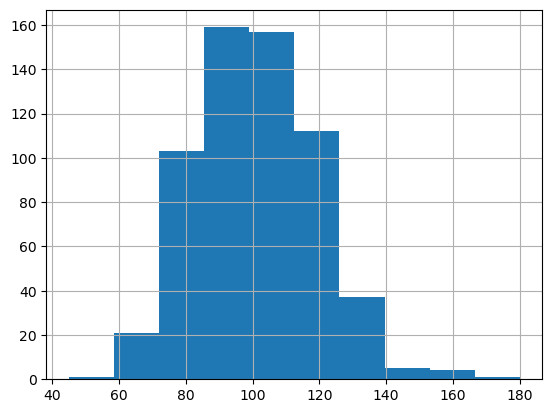

In [453]:
train_df.time.hist()

In [454]:
train_df[['time', 'box_off_num']].corr()

,time,box_off_num
time,1.000000,0.441452
box_off_num,0.441452,1.000000


In [455]:
train_df[(train_df.time <= 180) & (train_df.time > 120)][['time', 'box_off_num']].corr()

,time,box_off_num
time,1.000000,-0.026325
box_off_num,-0.026325,1.000000


In [456]:
train_df[(train_df.time < 120) & (train_df.time > 60)][['time', 'box_off_num']].corr()

,time,box_off_num
time,1.000000,0.388626
box_off_num,0.388626,1.000000


In [457]:
train_df[(train_df.time < 60) & (train_df.time > 0)]

,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,distributor_2way,distributor_3way,distributor_simple,distributor_complex
545,7,4,45,청소년 관람불가,이송희일,3389.0,1,2,2,2919,1,2,18,18


In [458]:
train_df[(train_df.time < 140) & (train_df.time > 60)][['time', 'box_off_num']].corr()

,time,box_off_num
time,1.000000,0.459398
box_off_num,0.459398,1.000000


## screening_rat

In [459]:
train_df.groupby('screening_rat')['box_off_num'].sum()

screening_rat
12세 관람가      86188052
15세 관람가     251998766
전체 관람가       12429242
청소년 관람불가     74292991
Name: box_off_num, dtype: int64

In [460]:
train_df.groupby('screening_rat')['box_off_num'].count().sort_values(ascending=False)

screening_rat
청소년 관람불가    204
15세 관람가     202
12세 관람가     102
전체 관람가       92
Name: box_off_num, dtype: int64

In [461]:
screening_rat_avg = {}
for r in train_df.screening_rat.unique():
    avg_by_rat = (train_df.groupby('screening_rat')['box_off_num'].sum()[r] /
        train_df.groupby('screening_rat')['box_off_num'].count().sort_values(ascending=False)[r])
    screening_rat_avg[r] = avg_by_rat
screening_rat_avg

{'청소년 관람불가': 364181.32843137253,
 '15세 관람가': 1247518.6435643565,
 '전체 관람가': 135100.45652173914,
 '12세 관람가': 844980.9019607843}

In [462]:
screening_rat_order = [k for k, v in sorted(screening_rat_avg.items(), key=lambda x: x[1])]
screening_rat_order

['전체 관람가', '청소년 관람불가', '12세 관람가', '15세 관람가']

In [463]:
for r in train_df.screening_rat.unique():
    train_df.loc[train_df.screening_rat == r, 'screening_rat'] = screening_rat_order.index(r)
    test_df.loc[test_df.screening_rat == r, 'screening_rat'] = screening_rat_order.index(r)

## director

In [464]:
train_df.director

0      조병옥
1      우민호
2      장철수
3      구자홍
4      신근호
      ... 
595    심성보
596    윤종찬
597    김대현
598    백운학
599    류승완
Name: director, Length: 600, dtype: object

In [465]:
train_df.groupby('director').screening_rat.count().sort_values().value_counts()

1    373
2     79
3     14
4      5
7      1
Name: screening_rat, dtype: int64

In [466]:
train_df.groupby('director').screening_rat.count().sort_values()

director
New Pistol    1
이정욱           1
이정범           1
이재한           1
이재규           1
             ..
신재호           4
전규환           4
우민호           4
노진수           4
홍상수           7
Name: screening_rat, Length: 472, dtype: int64

In [467]:
train_df.drop(columns=['director'], inplace=True)
test_df.drop(columns=['director'], inplace=True)

## dir_prev_bfnum

In [4]:
train_df[['dir_prev_bfnum', 'box_off_num']].corr()

,dir_prev_bfnum,box_off_num
dir_prev_bfnum,1.000000,0.283184
box_off_num,0.283184,1.000000


In [468]:
train_df['dir_prev_bfnum2'] = train_df.dir_prev_bfnum.isna().astype(int)
test_df['dir_prev_bfnum2'] = test_df.dir_prev_bfnum.isna().astype(int)

## dir_prev_num

In [5]:
train_df[['dir_prev_num', 'box_off_num']].corr()

,dir_prev_num,box_off_num
dir_prev_num,1.000000,0.259674
box_off_num,0.259674,1.000000


In [469]:
train_df.dir_prev_num

0      0
1      2
2      4
3      2
4      1
      ..
595    1
596    1
597    0
598    0
599    0
Name: dir_prev_num, Length: 600, dtype: int64

In [19]:
train_df.corr()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,dir_qnt
time,1.000000,0.264675,0.306727,0.623205,0.114153,0.441452,-0.040146
dir_prev_bfnum,0.264675,1.000000,0.131822,0.323521,0.083818,0.283184,0.131822
dir_prev_num,0.306727,0.131822,1.000000,0.450706,0.014006,0.259674,-0.047801
num_staff,0.623205,0.323521,0.450706,1.000000,0.077871,0.544265,-0.066014
num_actor,0.114153,0.083818,0.014006,0.077871,1.000000,0.111179,0.040375
box_off_num,0.441452,0.283184,0.259674,0.544265,0.111179,1.000000,-0.020151
dir_qnt,-0.040146,0.131822,-0.047801,-0.066014,0.040375,-0.020151,1.000000


## num_staff

<AxesSubplot:>

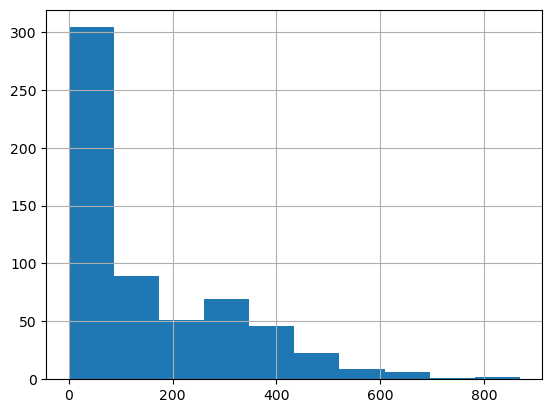

In [470]:
train_df.num_staff.hist()

In [471]:
train_df[['num_staff', 'box_off_num']].corr()

,num_staff,box_off_num
num_staff,1.000000,0.544265
box_off_num,0.544265,1.000000


## num_actor

<AxesSubplot:>

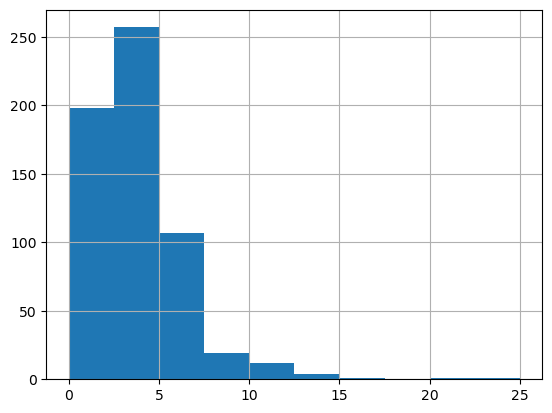

In [472]:
train_df.num_actor.hist()

In [473]:
train_df[['num_actor', 'box_off_num']].corr()

,num_actor,box_off_num
num_actor,1.000000,0.111179
box_off_num,0.111179,1.000000


## box_off_num

<AxesSubplot:>

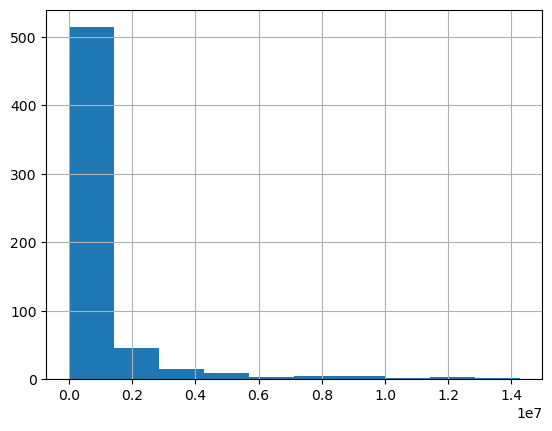

In [24]:
train_df.box_off_num.hist()

<AxesSubplot:>

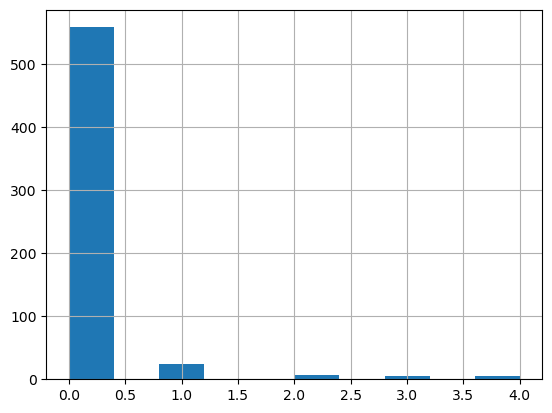

In [26]:
qnt = 5
pd.cut(train_df.box_off_num, qnt, labels=range(qnt)).hist()

<AxesSubplot:>

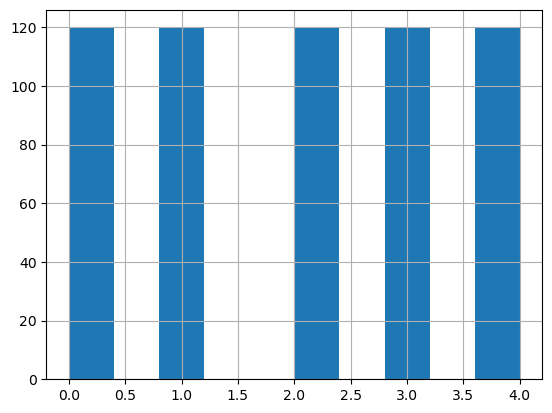

In [27]:
qnt = 5
pd.qcut(train_df.box_off_num, qnt, labels=range(qnt)).hist()

# Create New Dataframe

In [474]:
train_df.columns, len(train_df.columns)

(Index(['genre', 'release_time', 'time', 'screening_rat', 'dir_prev_bfnum',
        'dir_prev_num', 'num_staff', 'num_actor', 'box_off_num',
        'distributor_2way', 'distributor_3way', 'distributor_simple',
        'distributor_complex', 'dir_prev_bfnum2'],
       dtype='object'),
 14)

In [475]:
test_df.columns, len(test_df.columns)

(Index(['genre', 'release_time', 'time', 'screening_rat', 'dir_prev_bfnum',
        'dir_prev_num', 'num_staff', 'num_actor', 'distributor_2way',
        'distributor_3way', 'distributor_simple', 'distributor_complex',
        'dir_prev_bfnum2'],
       dtype='object'),
 13)

In [476]:
train_df.head()

,genre,release_time,time,screening_rat,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,distributor_2way,distributor_3way,distributor_simple,distributor_complex,dir_prev_bfnum2
0,10,4,96,1,NaN,0,91,2,23398,1,2,52,52,1
1,11,2,130,1,1161602.50,2,387,3,7072501,0,0,0,0,0
2,10,5,123,3,220775.25,4,343,4,6959083,0,0,0,0,0
3,8,4,101,0,23894.00,2,20,6,217866,0,0,0,0,0
4,8,0,108,3,1.00,1,251,2,483387,0,0,0,0,0


In [477]:
train_df.corr()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,distributor_2way,distributor_3way,distributor_simple,distributor_complex,dir_prev_bfnum2
time,1.000000,0.264675,0.306727,0.623205,0.114153,0.441452,-0.002126,0.006238,0.116785,0.118797,-0.266029
dir_prev_bfnum,0.264675,1.000000,0.131822,0.323521,0.083818,0.283184,-0.033881,-0.005482,0.046607,0.049272,NaN
dir_prev_num,0.306727,0.131822,1.000000,0.450706,0.014006,0.259674,0.003381,0.043203,0.139674,0.138452,-0.819666
num_staff,0.623205,0.323521,0.450706,1.000000,0.077871,0.544265,0.029090,0.066346,0.213252,0.212089,-0.394932
num_actor,0.114153,0.083818,0.014006,0.077871,1.000000,0.111179,0.030215,0.020325,0.031737,0.032495,0.012058
box_off_num,0.441452,0.283184,0.259674,0.544265,0.111179,1.000000,-0.102364,-0.076166,0.028418,0.026959,-0.217284
distributor_2way,-0.002126,-0.033881,0.003381,0.029090,0.030215,-0.102364,1.000000,0.936803,0.677851,0.674524,-0.025231
distributor_3way,0.006238,-0.005482,0.043203,0.066346,0.020325,-0.076166,0.936803,1.000000,0.817736,0.815834,-0.055393
distributor_simple,0.116785,0.046607,0.139674,0.213252,0.031737,0.028418,0.677851,0.817736,1.000000,0.998967,-0.139122
distributor_complex,0.118797,0.049272,0.138452,0.212089,0.032495,0.026959,0.674524,0.815834,0.998967,1.000000,-0.135916


In [478]:
train_df.to_csv('new_movies_train.csv', index=False)
test_df.to_csv('new_movies_test.csv', index=False)